# Events
***
## How To Build An Event In GillesPy2
***
Events allow changes to be made to a system (Event Assignments) as a result of a user defined condition (event trigger). Events in GillesPy2 are represented by 3 different Python objects:  
  
    1) Event(name=String, trigger=EventTrigger, assignments=(EventAssignment or  list of EventAssignments), delay=String, use_values_from_trigger_time=bool)  
    2) EventTrigger(expression=String, persistent=bool, value=bool)  
    3) EventAssignment(variable=(GillesPy2.Species, GillesPy2.Parameter), expression=String)
    
NOTE*** Currently the only solvers in the GillesPy2 library which implements events are the `TauHybridSolver` and `TauHybridCSolver`. These solvers can handle events for both discrete and continuous systems as well as mixed ode/ssa systems.  The type of simulation executed is determined by setting the `mode` attribute of each species to the appropriate setting ("continuous", "discrete", or "dynamic")
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../..')))

In [2]:
import gillespy2

***
## Build Example of a Discrete Stochastic system with Events
***
This is a simple example for mass-action degradation of species `S`.  We will add two events to demonstrate the usage of events.  The first event will assign the value `0` to our species once time passes 20, and the second event will be triggered once time crosses 30, assigning a value of `100` to our species and changing the value of our degradation rate parameter `k1` from `0.01` to `0.1`, causing the species to decay more quickly.

In [3]:
def build_example(parameter_values=None):
    # Initialize the model.
    model = gillespy2.Model(name="Example")

    # Define Variables (GillesPy2.Species)
    S = gillespy2.Species(name='Sp', initial_value=100, mode='discrete')

    # Add Variables to Model
    model.add_species(S)

    # Define Parameters
    k1 = gillespy2.Parameter(name='k1', expression=0.01)

    # Add Parameters to Model
    model.add_parameter(k1)

    # Define Reactions
    r = gillespy2.Reaction(name='R', reactants={S:1}, products={}, rate=k1)

    # Add Reactions to Model
    model.add_reaction(r)

    # Define Event Triggers
    et = gillespy2.EventTrigger(expression='t>20')
    et2 = gillespy2.EventTrigger(expression='t>30', persistent=True)

    # Define Event Assignments
    ea = gillespy2.EventAssignment(variable='Sp', expression='0')
    ea2 = gillespy2.EventAssignment(variable='Sp', expression='100')
    ea3 = gillespy2.EventAssignment(variable='k1', expression='.1')

    # Define Events
    e = gillespy2.Event(name='event1', trigger=et, assignments=[ea])
    e2 = gillespy2.Event(name='event2', trigger=et2, assignments=[ea2, ea3])

    # Add Events to Model
    model.add_event([e, e2])

    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=60, num_points=175)

    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [4]:
model = build_example()

***
## Run the Simulations
***

In [5]:
%time results = model.run(algorithm="Tau-Hybrid")

CPU times: user 17.5 ms, sys: 76.5 ms, total: 94 ms
Wall time: 5.81 s


### Same System Modeled as Continuous with Events

In [6]:
for species in model.listOfSpecies.values():
        species.mode = 'continuous'

In [7]:
cresults = model.run(algorithm = "Tau-Hybrid")

***
## Visualizations
***

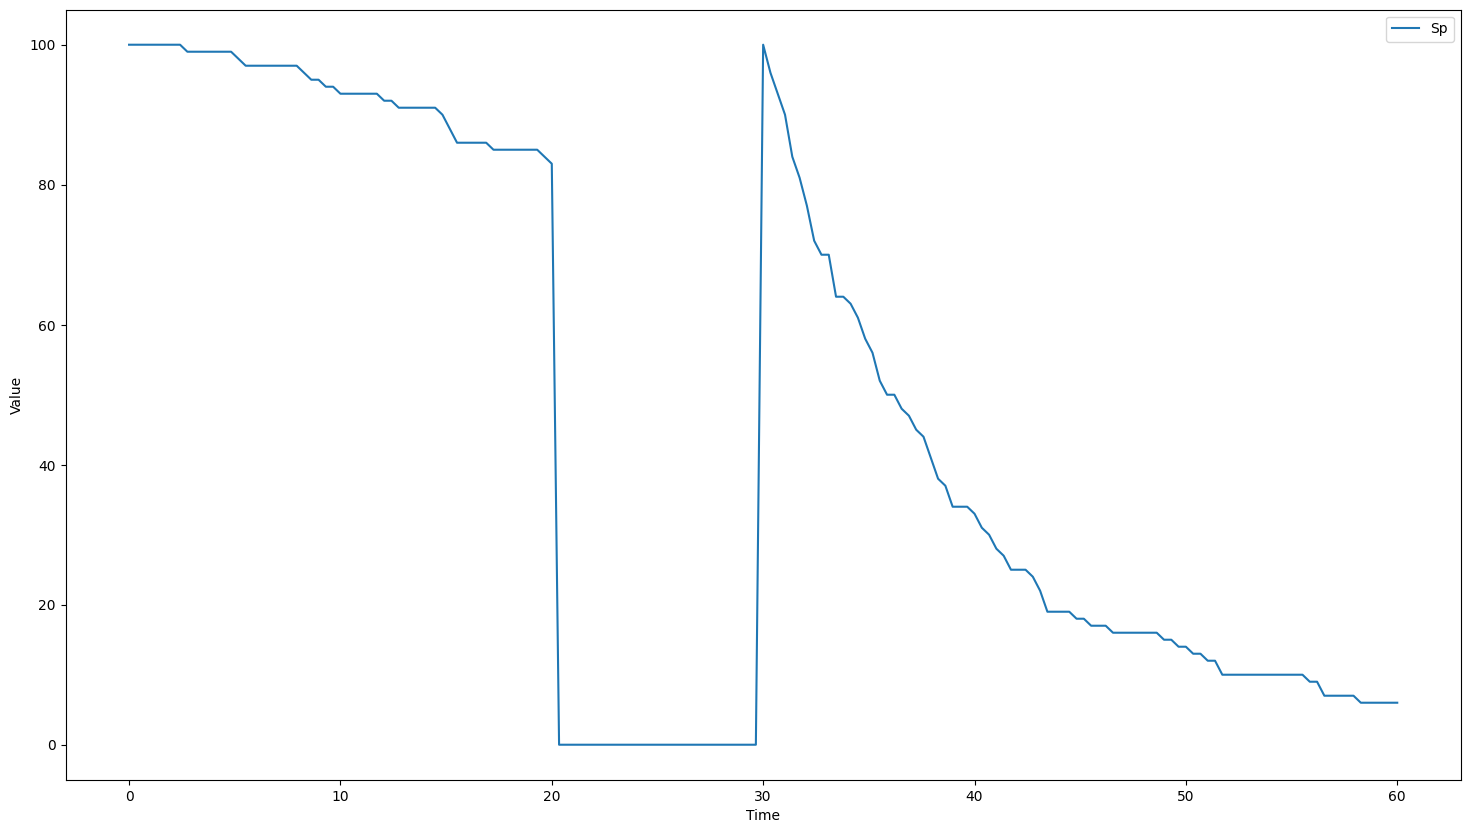

In [8]:
results.plot()

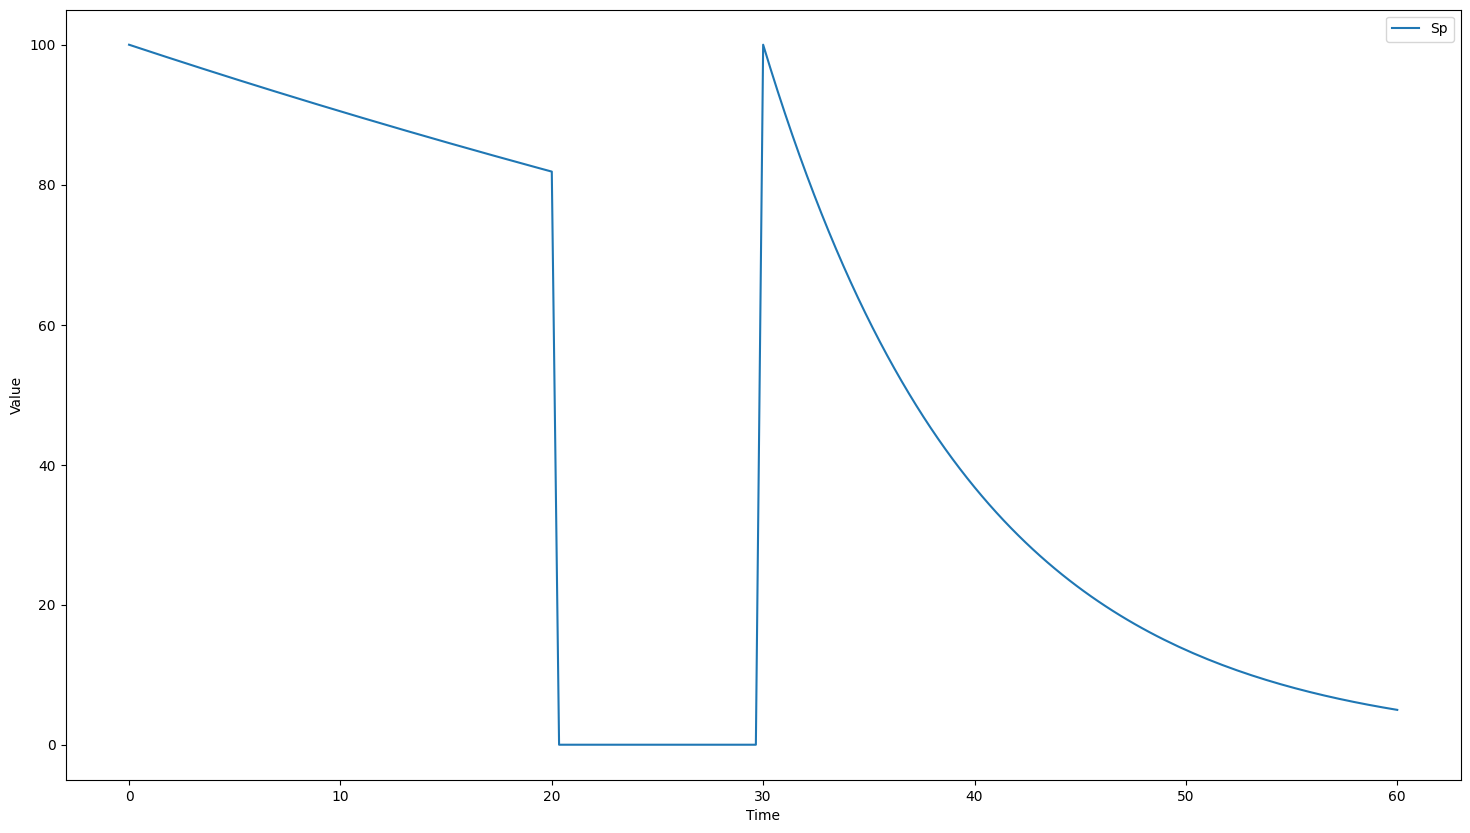

In [9]:
cresults.plot()